### Data Preprocessing

### Overview

This notebook is used to gather football's matches information (Home and Away) teams to be able to make predictions.  

### Pre-requisites 

1. A conda environment is needed.

For example:
```
cd path/to/conda/dir
conda env create -f aifootball_predictions.yaml
conda activate aifootball_predictions
python -m ipykernel install --user --name aifootball_predictions --display-name "aifootball_predictions"
```

2. A `~/.env` file

To create it, from the terminal:

`vim ~/.env`

then press `i` on the key board to insert lines into the file. Once you're happy with your changes press esc and then type `:wq!`.

A `~/.env` file is necessary to store the `API_FOOTBALL_DATA`. For example:

OPENAI_API_KEY=sdHbc..&66dc

You can get your own API key [here](https://www.football-data.org/)

### Authors

- mauo.andretta222@gmail.com

In [5]:
# install the necessary packages
from dotenv import load_dotenv
import requests
import pandas as pd
from datetime import datetime
import os
import json
from fuzzywuzzy import process
from PIL import Image
from io import BytesIO

In [6]:
load_dotenv(dotenv_path=os.path.expanduser("~/.env"))

True

In [17]:
# Define useful variables
API_KEY = os.getenv("API_FOOTBALL_DATA")
BASE_URL = 'https://api.football-data.org/v4'
headers = { 'X-Auth-Token': API_KEY }
TEST_URL = 'https://api.football-data.org/v4/competitions/2021/matches'

In [18]:
response = requests.get(TEST_URL, headers=headers)
data = response.json()  # Convert response to Python dictionary
with open('competitions.json', 'w') as json_file:
    json.dump(data, json_file, indent=4)


In [46]:
# Dictionary of major competition IDs (you can expand this list)
COMPETITIONS = {
    'E0': {'id': 2021, 'crest': 'https://crests.football-data.org/PL.png', 'next_matches': []},
    'SP1': {'id': 2014, 'crest': 'https://crests.football-data.org/PD.png', 
            'next_matches': []},
    'I1': {'id': 2019, 'crest': 'https://crests.football-data.org/SA.png',
           'next_matches': []},
    'D1': {'id': 2002, 'crest': 'https://crests.football-data.org/BL1.png',
           'next_matches': []},
    'F1': {'id': 2015, 'crest': 'https://crests.football-data.org/FL1.png',
           'next_matches': []}, 
}


In [47]:
def get_next_matches():
    """Get the next matches for each major league"""

    # Iterate over the competitions
    for competition, competition_info in COMPETITIONS.items():

        url = f'{BASE_URL}/competitions/{competition_info["id"]}/matches'
        response = requests.get(url, headers=headers)
        data = response.json()

        # Get the currentMatchday
        current_matchday = data['matches'][0]['season']['currentMatchday'] #int 
        # Get the total number of matches
        total_number_of_matches = len(data['matches']) #int
        # Get the last match_day to avoid out of range error
        last_match_day = data['matches'][-1]['matchday']
        # Define the next matchday
        next_matchday = current_matchday +1 if current_matchday < last_match_day else last_match_day

        print(f'{competition}: Current Matchday {current_matchday}, Total Matches {total_number_of_matches}')  

        # Iterate over all the matches
        for match in data['matches']:
            # Select only the matches for the current matchday
            if match['matchday'] != next_matchday:
                continue
            # Get the match date and time
            match_date = match['utcDate']
            match_date = datetime.strptime(match_date, '%Y-%m-%dT%H:%M:%SZ')
            # Format the date as 'YYYY-MM-DD HH:MM:SS'
            formatted_date = match_date.strftime('%Y-%m-%d %H:%M:%S')
            # Get the home team and away team
            home_team = match['homeTeam']['name']
            away_team = match['awayTeam']['name']
            
            # Get the crest for the home team and away team
            home_team_crest_url = match['homeTeam']['crest']
            away_team_crest_url = match['awayTeam']['crest']

            # Print the match info

            # Fetch the crests
            home_team_crest = Image.open(BytesIO(requests.get(home_team_crest_url).content))
            away_team_crest = Image.open(BytesIO(requests.get(away_team_crest_url).content))

            # Print the match info without the image object
            print(f'{formatted_date} - {home_team} vs. {away_team}')

            # Append the match info to the next_matches list
            COMPETITIONS[competition]["next_matches"].append({
                'date': formatted_date,
                'home_team': home_team,
                'away_team': away_team,
                'home_team_crest': home_team_crest,
                'away_team_crest': away_team_crest
            })    


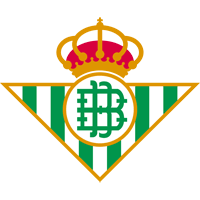

In [35]:
img = Image.open(BytesIO(requests.get("https://crests.football-data.org/90.png").content))
img

In [50]:
# Save the image as a GIF
img.save("output.gif", format="GIF")

c:\Users\Mauro Andretta\anaconda3\envs\aifootball_predictions\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [48]:
get_next_matches()

E0: Current Matchday 2, Total Matches 380
2024-08-31 11:30:00 - Arsenal FC vs. Brighton & Hove Albion FC
2024-08-31 14:00:00 - Brentford FC vs. Southampton FC
2024-08-31 14:00:00 - Everton FC vs. AFC Bournemouth
2024-08-31 14:00:00 - Ipswich Town FC vs. Fulham FC
2024-08-31 14:00:00 - Leicester City FC vs. Aston Villa FC
2024-08-31 14:00:00 - Nottingham Forest FC vs. Wolverhampton Wanderers FC
2024-08-31 16:30:00 - West Ham United FC vs. Manchester City FC
2024-09-01 12:30:00 - Chelsea FC vs. Crystal Palace FC
2024-09-01 12:30:00 - Newcastle United FC vs. Tottenham Hotspur FC
2024-09-01 15:00:00 - Manchester United FC vs. Liverpool FC
SP1: Current Matchday 3, Total Matches 380
2024-08-31 15:00:00 - FC Barcelona vs. Real Valladolid CF
2024-08-31 17:00:00 - Athletic Club vs. Club Atlético de Madrid
2024-08-31 17:15:00 - RCD Espanyol de Barcelona vs. Rayo Vallecano de Madrid
2024-08-31 19:30:00 - CD Leganés vs. RCD Mallorca
2024-08-31 19:30:00 - Valencia CF vs. Villarreal CF
2024-09-01 15

In [49]:
COMPETITIONS

{'E0': {'id': 2021,
  'crest': 'https://crests.football-data.org/PL.png',
  'next_matches': [{'date': '2024-08-31 11:30:00',
    'home_team': 'Arsenal FC',
    'away_team': 'Brighton & Hove Albion FC',
    'home_team_crest': <PIL.PngImagePlugin.PngImageFile image mode=P size=200x200>,
    'away_team_crest': <PIL.PngImagePlugin.PngImageFile image mode=P size=200x200>},
   {'date': '2024-08-31 14:00:00',
    'home_team': 'Brentford FC',
    'away_team': 'Southampton FC',
    'home_team_crest': <PIL.PngImagePlugin.PngImageFile image mode=P size=200x200>,
    'away_team_crest': <PIL.PngImagePlugin.PngImageFile image mode=P size=200x200>},
   {'date': '2024-08-31 14:00:00',
    'home_team': 'Everton FC',
    'away_team': 'AFC Bournemouth',
    'home_team_crest': <PIL.PngImagePlugin.PngImageFile image mode=P size=200x200>,
    'away_team_crest': <PIL.PngImagePlugin.PngImageFile image mode=P size=200x200>},
   {'date': '2024-08-31 14:00:00',
    'home_team': 'Ipswich Town FC',
    'away_team'

In [41]:
# read all the csv files from the data/processed folder
# walk through the data/raw folder and read all the csv files

directory_path = '../data/processed'  # Replace with your directory path
dataframes = {}

# Define a list which contains all the unique teams names
column_name = "HomeTeam"
full_teams_names = []
# Walk through the directory and find CSV files
for root, dirs, files in os.walk(directory_path):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)

            # Get the unique team names
            teams_name = (df[column_name].unique()).tolist()
            
        full_teams_names.extend(teams_name)

full_teams_names

['Leverkusen',
 'Hoffenheim',
 'Werder Bremen',
 'Schalke 04',
 'FC Koln',
 'Stuttgart',
 'Union Berlin',
 'Dortmund',
 'Freiburg',
 'Mainz',
 'Hertha',
 'Bayern Munich',
 'Wolfsburg',
 'RB Leipzig',
 'Ein Frankfurt',
 'Bochum',
 "M'gladbach",
 'Heidenheim',
 'Darmstadt',
 'Augsburg',
 'Crystal Palace',
 'Bournemouth',
 'Man United',
 'Brentford',
 'Leeds',
 'Southampton',
 'Chelsea',
 'Wolves',
 'Brighton',
 'Tottenham',
 'Everton',
 'Aston Villa',
 'Leicester',
 'Fulham',
 'Liverpool',
 'West Ham',
 'Man City',
 'Newcastle',
 "Nott'm Forest",
 'Luton',
 'Burnley',
 'Sheffield United',
 'Arsenal',
 'Ipswich',
 'Lyon',
 'Rennes',
 'Montpellier',
 'Brest',
 'Marseille',
 'Troyes',
 'Auxerre',
 'Nantes',
 'Toulouse',
 'Monaco',
 'Angers',
 'Nice',
 'Lorient',
 'Reims',
 'Clermont',
 'Strasbourg',
 'Lille',
 'Paris SG',
 'Lens',
 'Ajaccio',
 'Le Havre',
 'Metz',
 'Sampdoria',
 'Verona',
 'Monza',
 'Roma',
 'Udinese',
 'Empoli',
 'Lecce',
 'Spezia',
 'Bologna',
 'Juventus',
 'Sassuolo',
 '

### test with fuzzy

In [127]:
# Function to find the best match from full_teams_names for a given team name
def get_best_match(team_name, team_names_list, threshold=50):
    best_match = process.extractOne(team_name, team_names_list)
    if best_match and best_match[1] >= threshold:  # Match must be above the threshold
        return best_match[0]
    else:
        return None  # No suitable match found

# Function to replace team names in the next_matches dictionary
def replace_team_names(matches_dict, team_names_list):
    unmatched_teams_in_dict = set()
    matched_teams = set()

    for league, matches in matches_dict.items():
        for match in matches:
            home_team = get_best_match(match['home_team'], team_names_list)
            away_team = get_best_match(match['away_team'], team_names_list)

            if home_team:
                match['home_team'] = home_team
                matched_teams.add(home_team)
            else:
                unmatched_teams_in_dict.add(match['home_team'])

            if away_team:
                match['away_team'] = away_team
                matched_teams.add(away_team)
            else:
                unmatched_teams_in_dict.add(match['away_team'])

    unmatched_teams_in_list = set(team_names_list) - matched_teams

    return matches_dict, unmatched_teams_in_dict, unmatched_teams_in_list

In [128]:
# Apply the function to update the next_matches dictionary
updated_matches, unmatched_in_dict, unmatched_in_list = replace_team_names(next_matches, full_teams_names)

# Output the results
print("Updated Matches:")
print(updated_matches)

print("\nUnmatched Teams in Dictionary:")
print(unmatched_in_dict)

print("\nUnmatched Teams in List:")
print(unmatched_in_list)

Updated Matches:
{'E0': [{'date': '2024-08-31 11:30:00', 'home_team': 'Arsenal', 'away_team': 'Brighton'}, {'date': '2024-08-31 14:00:00', 'home_team': 'Brentford', 'away_team': 'Southampton'}, {'date': '2024-08-31 14:00:00', 'home_team': 'Everton', 'away_team': 'Bournemouth'}, {'date': '2024-08-31 14:00:00', 'home_team': 'Ipswich', 'away_team': 'Fulham'}, {'date': '2024-08-31 14:00:00', 'home_team': 'Leicester', 'away_team': 'Aston Villa'}, {'date': '2024-08-31 14:00:00', 'home_team': 'FC Koln', 'away_team': 'FC Koln'}, {'date': '2024-08-31 16:30:00', 'home_team': 'West Ham', 'away_team': 'FC Koln'}, {'date': '2024-09-01 12:30:00', 'home_team': 'Chelsea', 'away_team': 'Crystal Palace'}, {'date': '2024-09-01 12:30:00', 'home_team': 'Newcastle', 'away_team': 'Tottenham'}, {'date': '2024-09-01 15:00:00', 'home_team': 'FC Koln', 'away_team': 'Liverpool'}], 'SP1': [{'date': '2024-08-26 19:30:00', 'home_team': 'Villarreal', 'away_team': 'Celta'}, {'date': '2024-08-27 17:00:00', 'home_team':

### Manual Mapping

In [42]:
team_name_mapping = {
    'Arsenal FC': 'Arsenal',
    'Brighton & Hove Albion FC': 'Brighton',
    'Brentford FC': 'Brentford',
    'Southampton FC': 'Southampton',
    'Everton FC': 'Everton',
    'AFC Bournemouth': 'Bournemouth',
    'Ipswich Town FC': 'Ipswich',
    'Fulham FC': 'Fulham',
    'Leicester City FC': 'Leicester',
    'Aston Villa FC': 'Aston Villa',
    'Nottingham Forest FC': "Nott'm Forest",
    'Wolverhampton Wanderers FC': 'Wolves',
    'West Ham United FC': 'West Ham',
    'Manchester City FC': 'Man City',
    'Chelsea FC': 'Chelsea',
    'Crystal Palace FC': 'Crystal Palace',
    'Newcastle United FC': 'Newcastle',
    'Tottenham Hotspur FC': 'Tottenham',
    'Manchester United FC': 'Man United',
    'Liverpool FC': 'Liverpool',
    'Villarreal CF': 'Villarreal',
    'RC Celta de Vigo': 'Celta',
    'RCD Mallorca': 'Mallorca',
    'Sevilla FC': 'Sevilla',
    'Rayo Vallecano de Madrid': 'Vallecano',
    'FC Barcelona': 'Barcelona',
    'Real Betis Balompié': 'Betis',
    'Getafe CF': 'Getafe',
    'Athletic Club': 'Ath Bilbao',
    'Valencia CF': 'Valencia',
    'Real Valladolid CF': 'Valladolid',
    'CD Leganés': 'Leganes',
    'Real Sociedad de Fútbol': 'Sociedad',
    'Deportivo Alavés': 'Alaves',
    'Club Atlético de Madrid': 'Ath Madrid',
    'RCD Espanyol de Barcelona': 'Espanol',
    'Girona FC': 'Girona',
    'CA Osasuna': 'Osasuna',
    'UD Las Palmas': 'Las Palmas',
    'Real Madrid CF': 'Real Madrid',
    'Venezia FC': 'Venezia',
    'Torino FC': 'Torino',
    'FC Internazionale Milano': 'Inter',
    'Atalanta BC': 'Atalanta',
    'Bologna FC 1909': 'Bologna',
    'Empoli FC': 'Empoli',
    'US Lecce': 'Lecce',
    'Cagliari Calcio': 'Cagliari',
    'SS Lazio': 'Lazio',
    'AC Milan': 'Milan',
    'SSC Napoli': 'Napoli',
    'Parma Calcio 1913': 'Parma',
    'ACF Fiorentina': 'Fiorentina',
    'AC Monza': 'Monza',
    'Genoa CFC': 'Genoa',
    'Hellas Verona FC': 'Verona',
    'Juventus FC': 'Juventus',
    'AS Roma': 'Roma',
    'Udinese Calcio': 'Udinese',
    'Como 1907': 'Como', 
    '1. FC Union Berlin': 'Union Berlin',
    'FC St. Pauli 1910': None,  # No match found in the list
    'VfB Stuttgart': 'Stuttgart',
    '1. FSV Mainz 05': 'Mainz',
    'Eintracht Frankfurt': 'Ein Frankfurt',
    'TSG 1899 Hoffenheim': 'Hoffenheim',
    'SV Werder Bremen': 'Werder Bremen',
    'Borussia Dortmund': 'Dortmund',
    'VfL Bochum 1848': 'Bochum',
    'Borussia Mönchengladbach': "M'gladbach",
    'Holstein Kiel': None,  # No match found in the list
    'VfL Wolfsburg': 'Wolfsburg',
    'Bayer 04 Leverkusen': 'Leverkusen',
    'RB Leipzig': 'RB Leipzig',
    '1. FC Heidenheim 1846': 'Heidenheim',
    'FC Augsburg': 'Augsburg',
    'FC Bayern München': 'Bayern Munich',
    'SC Freiburg': 'Freiburg',
    'Olympique Lyonnais': 'Lyon',
    'RC Strasbourg Alsace': 'Strasbourg',
    'Stade Brestois 29': 'Brest',
    'AS Saint-Étienne': 'St Etienne',
    'Montpellier HSC': 'Montpellier',
    'FC Nantes': 'Nantes',
    'Toulouse FC': 'Toulouse',
    'Olympique de Marseille': 'Marseille',
    'AS Monaco FC': 'Monaco',
    'Angers SCO': 'Angers',
    'OGC Nice': 'Nice',
    'Le Havre AC': 'Le Havre',
    'AJ Auxerre': 'Auxerre',
    'Stade de Reims': 'Reims',
    'Stade Rennais FC 1901': 'Rennes',
    'Lille OSC': 'Lille',
    'Paris Saint-Germain FC': 'Paris SG',
    'Racing Club de Lens': 'Lens',
    'AC Ajaccio': 'Ajaccio',
    'FC Metz': 'Metz',
}

In [43]:
# Function to replace team names in the dictionary using the mapping
def replace_team_names(matches_dict, name_mapping):
    for league, leagues_info in matches_dict.items():
        for match in leagues_info["next_matches"]:
            if match['home_team'] in name_mapping:
                match['home_team'] = name_mapping[match['home_team']]
            if match['away_team'] in name_mapping:
                match['away_team'] = name_mapping[match['away_team']]
    return matches_dict

In [44]:
# Apply the function
next_matches_fd_couk_format = replace_team_names(COMPETITIONS, team_name_mapping)
next_matches_fd_couk_format

{'E0': {'id': 2021,
  'crest': 'https://crests.football-data.org/PL.png',
  'next_matches': [{'date': '2024-08-31 11:30:00',
    'home_team': 'Arsenal',
    'away_team': 'Brighton',
    'home_team_crest': 'https://crests.football-data.org/57.png',
    'away_team_crest': 'https://crests.football-data.org/397.png'},
   {'date': '2024-08-31 14:00:00',
    'home_team': 'Brentford',
    'away_team': 'Southampton',
    'home_team_crest': 'https://crests.football-data.org/402.png',
    'away_team_crest': 'https://crests.football-data.org/340.png'},
   {'date': '2024-08-31 14:00:00',
    'home_team': 'Everton',
    'away_team': 'Bournemouth',
    'home_team_crest': 'https://crests.football-data.org/62.png',
    'away_team_crest': 'https://crests.football-data.org/1044.png'},
   {'date': '2024-08-31 14:00:00',
    'home_team': 'Ipswich',
    'away_team': 'Fulham',
    'home_team_crest': 'https://crests.football-data.org/349.png',
    'away_team_crest': 'https://crests.football-data.org/63.png'}

In [45]:
with open('next_matches.json', 'w') as json_file:
    json.dump(next_matches_fd_couk_format, json_file, indent=4)